# Estudio de la mejor red

## Preparación del entorno

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras as ker

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

## Lectura dataset

In [12]:
iris_RAW = pd.read_csv('../Data/iris.data', sep=',')

iris_entrenamiento, iris_test = train_test_split(iris_RAW, test_size = 0.20, shuffle=True) # El entreno es el 80% y el conjunto prueba 20%

# Generamos las salidas de las diferentes listas
esperadas_entrenamiento = iris_entrenamiento.pop("class")
esperadas_test = iris_test.pop("class")


## Creación entradas y salidas

In [13]:
# Normalización entradas en base a máximo y mínimo (máximo es 1 - mínimo es 0)

irisE = (iris_entrenamiento - iris_entrenamiento.min()) / (iris_entrenamiento.max() - iris_entrenamiento.min())
irisT = (iris_test - iris_test.min()) / (iris_test.max() - iris_test.min())

entradasE =  irisE.to_numpy() # Las 30 posibles variables
esperadasE = esperadas_entrenamiento.to_numpy() # Array de B/M con el diagnóstico

entradasT = irisT.to_numpy() 
esperadasT = esperadas_test.to_numpy()

# Categorizamos el diagnostico de entreno 
label_encoder = LabelEncoder()
esperadasE = label_encoder.fit_transform(esperadasE)

# Categorizamos el diagnostico de predicción 
esperadasT = label_encoder.fit_transform(esperadasT)


## Variables a tocar

In [14]:
nNeuronasCapaOculta = 4 # Tocar
Epoch = 500 # Tocar
tam_entrada = irisE.shape[1] # Tamaño de la capa de entrada = columnas

automatizador = True # Ejecutar el automatizador para encontrar los parametros que mas se ajustan a los datos

## Creación y ajuste de la red

In [15]:
def initRed(nNeuronasCapaOculta, tam_entrada):
    MLP = ker.Sequential() # Creamos el modelo vacío

    # Añadimos la primera capa (tecnicamente dos, la de entrada (con la variable input_dim) y la oculta)
    MLP.add(ker.layers.Dense(nNeuronasCapaOculta, input_dim = tam_entrada, activation='relu'))

    # Añadimos la capa de salida
    MLP.add(ker.layers.Dense(3,activation='sigmoid')) 

    # MLP.summary()

    # Por último tenemos que configurar el modelo antes de entrenarlo con lo dicho en el enunciado
    # Optimizador: Adam
    # Función error: Mean Squared Error
    # Metricas = Binary accuracy porque nos da el número de precisión de la red
    MLP.compile(optimizer='adam',loss='mean_squared_error',metrics=["binary_accuracy"])
    return MLP

## Entrenamiento de la red 

In [16]:
def entrenar(MLP,Epoch,entradas,esperadas):#,entradasVal,esperadasVal):
    # Por último entrenamos la red con el epoch (nº iteraciones)
    output_fit = MLP.fit(entradas,esperadas,validation_split=0.20,epochs=Epoch,verbose = 0) #validation_data=() % 20% de los datos se usan para validar
    return output_fit

## Calidad de la red

In [17]:
def pintarExact(output_fit):
    print(output_fit.history.keys())
    # Pintamos las tanto la loss como la accuracy
    plt.plot(output_fit.history['loss'])
    plt.plot(output_fit.history['binary_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Error', 'Exactitud'], loc='lower left')
    plt.show()

## Evaluación de la red

In [18]:
def evaluar(MLP,entradas,esperadas):
    # Evaluamos el modelo
    print("Datos evaluados")
    evaluar = MLP.evaluate(entradas, esperadas,verbose=0)
    print("Error, Exactitud:", evaluar)
    pesos = MLP.get_weights()
    return evaluar

def evaluarAuto(MLP,entradas,esperadas):
    return MLP.evaluate(entradas, esperadas,verbose=0)

## Prueba de nuestra mejor red

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


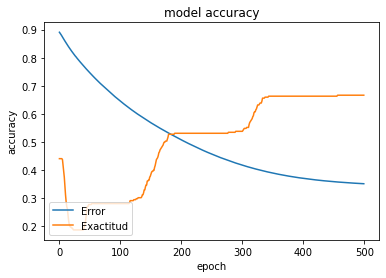

Datos evaluados
Error, Exactitud: [0.319204717874527, 0.699999988079071]
[[ 0.00597317 -0.63774794  0.33715075  0.38378268  1.2746012   0.9161064
   0.68115   ]
 [ 1.4549176  -0.52744347 -0.53696156 -0.22609317 -0.95461863 -0.7667437
  -0.27044365]
 [-0.7706669   0.47819006 -0.60831964 -0.43601868  1.3168368   0.961031
  -0.4327534 ]
 [-1.0753669  -0.13982162 -0.01910526 -0.15924245  0.8543055   0.6793002
  -0.73573613]]
[[-1.6668969  -0.89659154 -1.4279666 ]
 [-0.61225086  0.01243849 -0.75392735]
 [-0.65517044 -0.68811816 -0.7045466 ]
 [-0.25826418 -0.31905365 -0.19438863]
 [ 1.3788462   0.5041396   1.3342423 ]
 [ 1.5249462   1.4277548   1.6360143 ]
 [-0.6031354   0.7371231   0.12324044]]


In [19]:
if not automatizador:
    MLP = initRed(nNeuronasCapaOculta, tam_entrada)
    output_fit = entrenar(MLP,Epoch,entradasE,esperadasE)#,entradasV,esperadasV) # conjunto de entrenamiento junto con el conjunto de validación
    pintarExact(output_fit)
    evaluacion = evaluar(MLP,entradasT,esperadasT)  # conjunto de prueba

# Estudio del Nº Neuronas óptimo

In [20]:
# neuronas
errorF = []
accuracyF = []
if automatizador:
    neuronas = [i for i in range(1,10,1)]
    precision = 5
    # Una vez hemos inicializado, podemos empezar a iterar con las listas creadas para encontrar la mejor configuración para los datos 
    err = []
    ex = []
    outputErr = [err,ex]
    for neurona in neuronas:
        print("Numero de neuronas:",neurona,end="\r")
        for i in range(precision):
            MLP = initRed(neurona, tam_entrada)
            output_fit = entrenar(MLP,100,entradasE,esperadasE)
            error,exact = evaluarAuto(MLP,entradasT,esperadasT)
            err.append(error)
            ex.append(exact)
        outputErr[0].append(np.mean(err))
        outputErr[1].append(np.mean(exact))
    errorF = outputErr[0].copy()
    accuracyF = outputErr[1].copy()
    # Ahora pintamos la grafica para ver el error y la precisión
    plt.title('Precision')
    plt.plot(outputErr[0])
    plt.plot(outputErr[1])
    plt.legend(['Error', 'Exactitud'], loc='center right')
    plt.ylabel('Error & Exactitud')
    plt.xlabel('Numero de neuronas por capa')
    plt.show()
    print("Iter , loss, accuracy")
    for i in range(len(errorF)):
        print(i, errorF[i],accuracyF[i])

Yo creo que 7 es el numero clave mirar las fotos a ver que sacais vosotros

# Bibliografía

- LAB02 de nuestro grupo 